<a href="https://colab.research.google.com/github/PedroLavin/Origin/blob/master/TF2_0_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.datasets import fashion_mnist

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [5]:
#The network a three dimensional input, so we add one dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [10]:
K = len(set(y_train))

In [11]:
#build the CNN using the Keras functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.7037 - accuracy: 0.7431 - val_loss: 0.4126 - val_accuracy: 0.8421
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3817 - accuracy: 0.8558 - val_loss: 0.3526 - val_accuracy: 0.8677
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3174 - accuracy: 0.8794 - val_loss: 0.3195 - val_accuracy: 0.8799
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2845 - accuracy: 0.8912 - val_loss: 0.3139 - val_accuracy: 0.8851
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2530 - accuracy: 0.9046 - val_loss: 0.3170 - val_accuracy: 0.8857
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2308 - accuracy: 0.9119 - val_loss: 0.3061 - val_accuracy: 0.8903
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2090 - accuracy: 0.9197 - val_loss: 0.2944 -

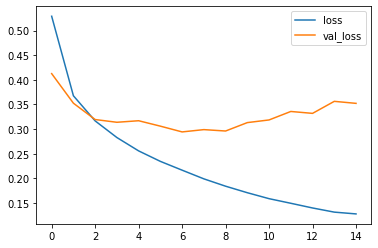

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()